### Objective
Are top 20 CO2 emitters countriesmore impacted than the rest of the countiers in terms of temperature change?

### Summary
We followed [the preceeding analysis](https://github.com/masamurai/AppliedDataScience/blob/master/project/notebooks/200-temperature-change-by-proximity-CO2.ipynb) and performed hypothesis tests, but this time, the countries are divided based on whether or not they are top 20 CO2 emitters. Again, we tested based on two definition of "temerature change" and we did not find sufficient evidence that the mean temperature change in top 20 CO2 emitters are larger than the change for the rest of the countries.

### Approach 1: Z-test

* H0 (Null) CO2 impacts everyone irrespective of Co2 proximity
* Ha (alternate) The top 20 countries Co2 are more impacted


* dataset1 = average temperatures change 1960-2010 for non top 20 emitters countries
* dataset2 = average temperatures change 1960-2010 for top 20 emitters countries


* H0 = Mean (dataset 2) - Mean (dataset 1) = 0
* Ha = Mean (dataset 2) - Mean (dataset 1) > 0

** NOTE: **
* average temperatures change is defined as the difference between first (1960) and last year (2012) in the dataset, divided by number of years.

#### Load packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from scipy.stats import ttest_ind

#### Load and clean data

In [2]:
# load dataset containing average temperatures change
df_temp_change = pd.read_csv('../data/df_avg_temp_change.csv')

# Now, let's get a list of countries with top 20 CO2 emissions
# load main dataset
df = pd.read_csv('../data/ADS_project_dataset2.csv', header=0, parse_dates=[0], squeeze=True)

df_group = df.loc[:,['Country', 'Group']].drop_duplicates().reset_index(drop=True)

# combine temperatures change dataset with top20 emitters
df_comb = df_temp_change.merge(df_group, how='left', on='Country')

# get average temperature changes for top 20 emitters countries
TempChangeTop20 = df_comb[df_comb['Group'] == 'Top20'].AvgTempChange

# get average temperature changes for top 20 emitters countries
TempChangeRest = df_comb[df_comb['Group'] != 'Top20'].AvgTempChange

#### Visualization

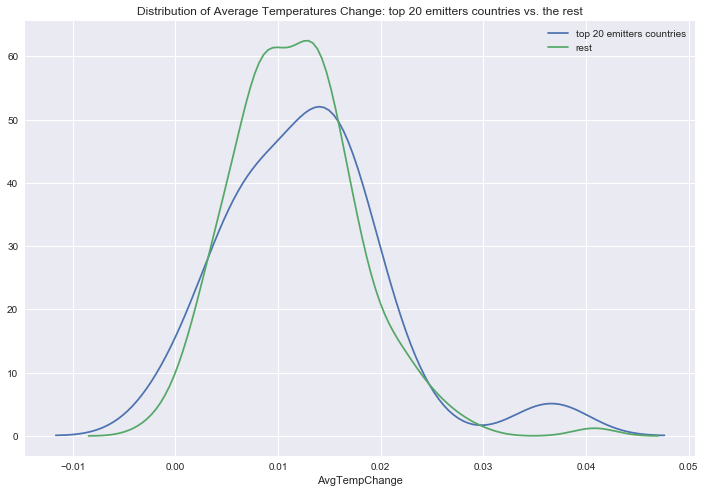

In [6]:
# compare distribution of average temperatures change between countries >80% Co2 within 2000 miles and the rest
plt.figure(figsize=(12,8))
plt.title('Distribution of Average Temperatures Change: top 20 emitters countries vs. the rest')
sns.distplot(TempChangeTop20, hist=False, label='top 20 emitters countries')
sns.distplot(TempChangeRest, hist=False, label='rest');

There is no obvious difference in the distribution of average temperature change between the two groups of the countries while average temperature change in Top 20 CO2 emitters are slightly but widely spread.

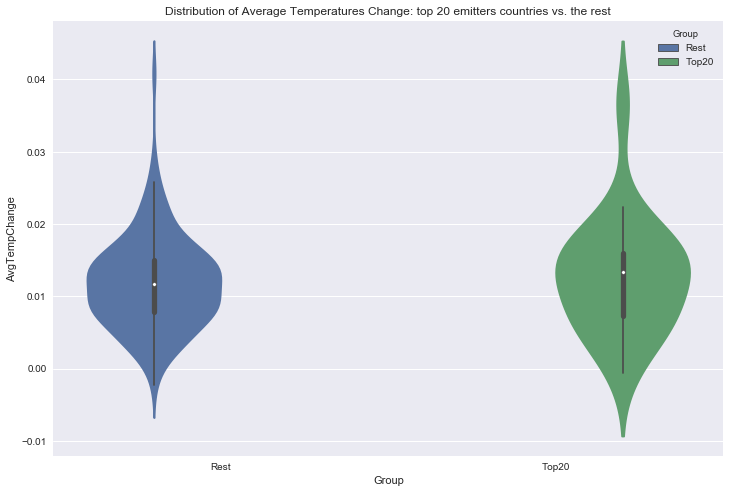

In [7]:
# compare distribution of temperatures in 1990 and 2010
plt.figure(figsize=(12,8))
plt.title('Distribution of Average Temperatures Change: top 20 emitters countries vs. the rest')
sns.violinplot(x='Group', y='AvgTempChange', hue='Group', data=df_comb);

The violin plot tells us the same story.

#### Method: Z-test

In [8]:
ttest_ind(TempChangeTop20, TempChangeRest)

Ttest_indResult(statistic=0.6246541002066779, pvalue=0.5330163383937434)

#### Results
The observed p-value is 0.62 is greate than 0.025, and we failed to reject null hypothesis that there is a difference in average temperatures change between top20 CO2 emitters countries and the rest.

### Approach 2: Comparing Slope of Fitted Line
Just as [this analysis](https://github.com/masamurai/AppliedDataScience/blob/master/project/notebooks/200-temperature-change-by-proximity-CO2.ipynb), the results from Z-test are somewhat counter-intuitive as one of the prevailing view of global warming is in its causal relation to high-level of CO2 emissions. Again, this contradicting views can stem from the definition of "temperature change". In the previous section, average temperatures change is defined as the difference between first (1960) and last year (2012) in the dataset, divided by number of years. In this section, as an alternative definition, temperature change is now defined as the slope of a fitted line in each country's decomposed trend temperature data obtained from [this analysis](https://github.com/masamurai/AppliedDataScience/blob/master/project/notebooks/100-temperature-change.ipynb).

#### Data clensing

In [14]:
# load data
df_master_result_sm = pd.read_csv('../data/df_master_result_sm.csv')

# get the list of countries >80% Co2 within 2000 miles extracted in notebook 09-hypothesis-test2
country_top20 = list(df_comb[df_comb['Group'] == 'Top20'].Country)

# flag countries >80% Co2 within 2000 miles using the list obove
df_master_result_sm['flagTop20'] = np.where(df_master_result_sm['country'].isin(country_top20), True, False)

# split the dataset based on whether or not countries >80% Co2 within 2000 miles
df_top20 = df_master_result_sm[df_master_result_sm['flagTop20'] == True].reset_index()
df_rest = df_master_result_sm[df_master_result_sm['flagTop20'] == False].reset_index()

#### Visualization

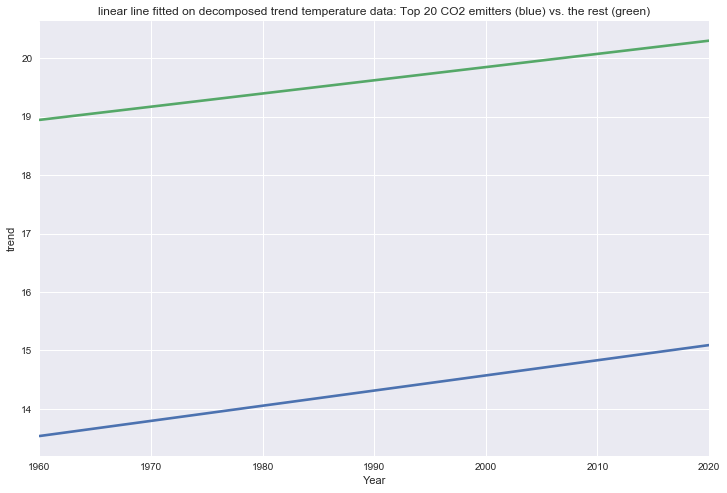

In [16]:
plt.figure(figsize=(12,8))
plt.title('linear line fitted on decomposed trend temperature data: Top 20 CO2 emitters (blue) vs. the rest (green)')
plt.xlim(1960, 2020)
sns.regplot(x='Year', y='trend', ci=None, scatter=False, data=df_top20)
sns.regplot(x='Year', y='trend', ci=None, scatter=False, data=df_rest);

The chart above compares a fitted linear line that summarizes temperature changes for Top 20 CO2 emitters and the rest. While the intercepts are different, it appears that the slopes are very similar and the two lines run paralell. Now, let's confirm the insights with Z-test by comparing mean slope of the two groups of countries.

#### Method: Z-test

In [17]:
# load data
df_fit = pd.read_csv('../data/df_fit.csv')

# add a flag
df_fit['flagTop20'] = np.where(df_fit['country'].isin(country_top20), True, False)

# get p-values for the two groups of the countries
pval_top20 = df_fit[df_fit['flagTop20']]['slope']
pval_rest = df_fit[~df_fit['flagTop20']]['slope']

# perform Z-test
ttest_ind(pval_top20, pval_rest)

Ttest_indResult(statistic=1.750960693165322, pvalue=0.08172511251763748)

#### Results

P-value of 0.20 indicates that the data d not provide sufficient evidence, at $\alpha = 0.5$, for us to conclude that the mean slope for Top 20 CO2 emitters is different from the rest. The same conclusion was drawn regardless of the definition of temperature changes.